# **Challenge Project: Computational Protein Structure Assessment**
**David Zhao | Protein Bioinformatics | AS.410.639.01.FA25**

## Introduction to N-acetyl-L-ornithine transcarbamylase (AOTC) enzyme from *Xanthomonas campestris pv. campestris str. ATCC 33913*

*Xanthomonas campestris* N-acetyl-L-ornithine transcarbamylase (XcAOTC) is an enzyme responsible for catalyzing the following reaction:

carbamoyl phosphate (CP) + N<sub>2</sub>-acetyl-L-ornithine ⇌ phosphate + N-acetyl-L-citrulline

This enzyme belongs to the aspartate/ornithine carbamoyltransferase (ATCase/OTCase) superfamily.

A particularly interesting feature of XcAOTC is that it forms a trefoil knot upon complete folding between residues 171 and 278, *a very rare structural motif observed in only about 1% of all protein structures deposited in the PDB* (Jamroz et al., 2015). Even more intriguing is the role of this knot in modulating enzymatic activity. Ornithine transcarbamylase (OTCase), another member of the ATCase/OTCase family, instead processes L-ornithine. Research has demonstrated that unknotted OTCase homologs possess accessible residues between positions 263 and 268, which strongly interact with the ligand where AOTC cannot (Shi, D. et al., 2000).

This notebook will explore three structural questions related to AOTC. To do so, it is necessary to retrieve structural information related to this protein from the Protein Data Bank (PDB). We will begin by downloading the key structures of AOTC:

- **3KZC**: Crystal structure of XcAOTC
- **3KZN**: Crystal structure of XcAOTC complexed with N-acetyl-L-ornithine
- **3KZM**: Crystal structure of XcAOTC complexed with CP
- **3KZK**: Crystal structure of XcAOTC complexed with acetylcitrulline

In [1]:
from Bio import PDB

AOTC_STRUCTURE_IDS = ["3kzc", "3kzn", "3kzm", "3kzk"]
# Make sure to have a folder in the current directory "./structures" to store downloaded structures.
STORED_STRUCTURES_PATH = ".\\structures"

pdb_list = PDB.PDBList(pdb=STORED_STRUCTURES_PATH)
aotc_cifs = [pdb_list.retrieve_pdb_file(pdb_code=structure) for structure in AOTC_STRUCTURE_IDS]

Structure exists: '.\structures\kz\3kzc.cif' 
Structure exists: '.\structures\kz\3kzn.cif' 
Structure exists: '.\structures\kz\3kzm.cif' 
Structure exists: '.\structures\kz\3kzk.cif' 


To get a general sense of the structure of the protein, we can view the downloaded files in our molecular visualizer of choice (PyMOL, Chimera, etc.). Alternatively, we can view them interactively in this notebook through py3Dmol. Let's visualize just the structure of the base AOTC enzyme with no ligands bound (3KZC):

In [2]:
import py3Dmol

# feel free to swap out which protein to visualize based on the index
with open(aotc_cifs[0]) as file: 
    aotc_system = "".join([x for x in file])

view1 = py3Dmol.view(width=800, height=600)
view1.addModelsAsFrames(aotc_system)
view1.setStyle({'model': -1}, {"cartoon": {'color': 'spectrum'}})
view1.zoomTo()
view1.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

## Research Questions this Notebook Explores 

### Structural Question 1: Is the flexibility of the DxxSMG motif (SMG) loop a common feature for the catalytic process in all proteins of the transcarbamylase family?

Inspiration from Source Literature:
> "Superposition of the binary and ternary complexes demonstrates that the SMG loop shifts by more than 8.0 Å when the second substrate binds (Figure 4). The high B factors associated with residues 266–279 in the binary structure indicate that this loop has a high degree of flexibility before the second substrate binds. Flexibility of the equivalent 240s loop in ATCase has been previously reported. The movement of this loop seems to be essential for binding the second substrate and releasing the products. Whether the movement of this loop is a common feature during the catalytic reaction in the transcarbamylase family remains to be established."

Shi, D., Morizono, H., Yu, X., Tong, L., Allewell, N. M., & Tuchman, M. (2001). Human ornithine transcarbamylase: crystallographic insights into substrate recognition and conformational changes. The Biochemical Journal, 354(Pt 3), 501–509. https://doi.org/10.1042/0264-6021:3540501

**Need to knows**:
- How can we measure the flexibility of a protein region?
- How can we extract the sequences for proteins of an entire family from online databases?
- What information from a PDB entry of the relevant proteins would be helpful in determining the flexibility of a protein or a protein region?
- What sequence specific factors of a protein indicate whether a region is more or less flexible?

### Investigating Question 1

#### The B Factor

The **B factor** is a good approximator for the flexibility of a protein region. B factors indicate the relative vibrational motion of different parts of the structure (Bahar, I. et al., 1997), and thus *regions of higher flexibility would have higher B factors than more stable parts of the protein*. 

BioPandas is a wonderful package which can convert MMCIF representations of proteins into a pandas DataFrame. Since I'm a machine learning / data science person I really like using this package for working with protein data. Let's have a look at the kind of data we get from loading in our MMCIF file.

In [3]:
from biopandas.mmcif import PandasMmcif
import pandas as pd
import numpy as np

pmmcif = PandasMmcif()

structure = pmmcif.read_mmcif(aotc_cifs[0])
atoms_df = structure.df['ATOM']
atoms_df.head()

group_PDB  id type_symbol label_atom_id label_alt_id label_comp_id  \
0      ATOM   1           N             N         None           LEU   
1      ATOM   2           C            CA         None           LEU   
2      ATOM   3           C             C         None           LEU   
3      ATOM   4           O             O         None           LEU   
4      ATOM   5           C            CB         None           LEU   

  label_asym_id  label_entity_id label_seq_id pdbx_PDB_ins_code  ...  Cartn_y  \
0             A                1           23              None  ...   47.541   
1             A                1           23              None  ...   48.421   
2             A                1           23              None  ...   49.210   
3             A                1           23              None  ...   49.243   
4             A                1           23              None  ...   49.382   

   Cartn_z  occupancy  B_iso_or_equiv  pdbx_formal_charge auth_seq_id  \
0   79.313        1.0           52.38                None           3   
1   78.107        1.0           51.85                None           3   
2   78.039        1.0           49.52                None           3   
3   76.997        1.0           49.99                None           3   
4   78.085        1.0           53.86                None           3   

   auth_comp_id auth_asym_id auth_atom_id pdbx_PDB_model_num  
0           LEU            A            N                  1  
1           LEU            A           CA                  1  
2           LEU            A            C                  1  
3           LEU            A            O                  1  
4           LEU            A           CB                  1  

[5 rows x 21 columns]

#### B factors across XcAOTC

Now that we have our `DataFrame`,  we can easily get some summary statistics on our B factor values as well, defined in the column `B_iso_or_equiv` for the `DataFrame`:

count    2571.000000
mean       50.059774
std        20.706041
min        16.910000
25%        32.420000
50%        45.640000
75%        64.025000
max       103.680000
Name: B_iso_or_equiv, dtype: float64


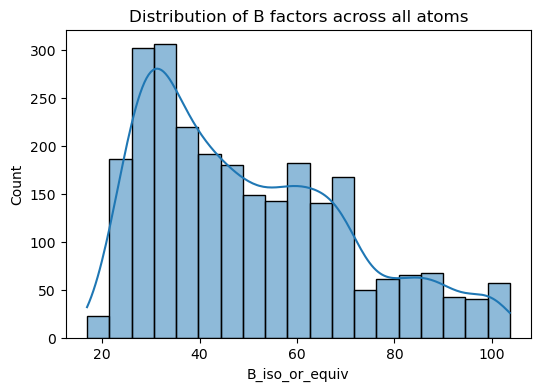

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

print(atoms_df["B_iso_or_equiv"].describe())
plt.figure(figsize=(6,4))
sns.histplot(atoms_df["B_iso_or_equiv"], kde=True)
plt.title("Distribution of B factors across all atoms")
plt.show()

We see that the largest B factor recorded in our protein is around 103, whereas the smallest B factor recorded is around 17. Given this `DataFrame`, we can also plot our B factors across all atoms in our protein:

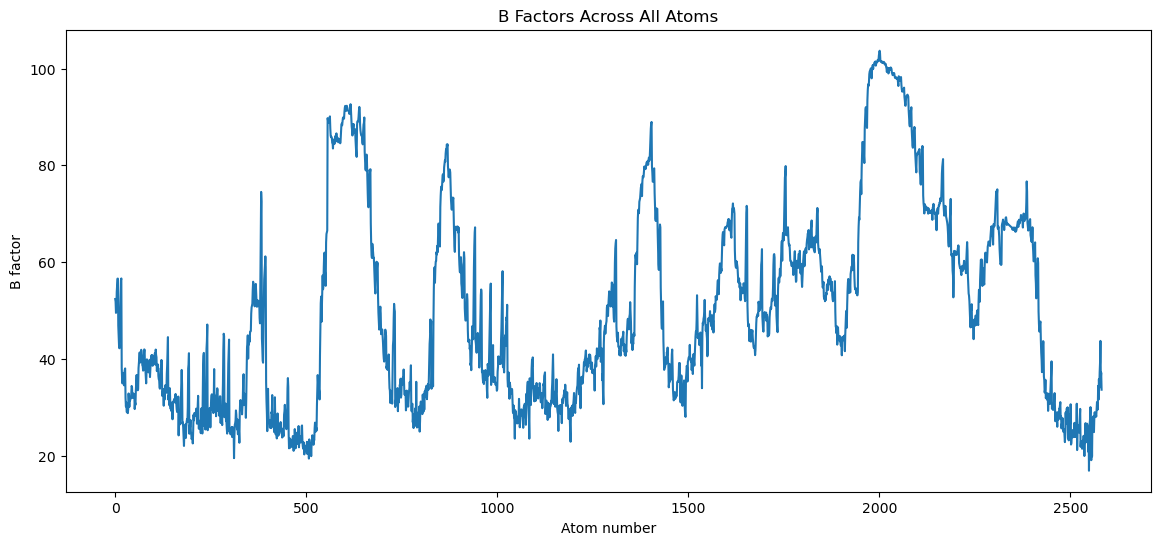

In [5]:
plt.figure(figsize=(14,6))
sns.lineplot(data=atoms_df['B_iso_or_equiv'])
plt.title("B Factors Across All Atoms")
plt.ylabel("B factor")
plt.xlabel("Atom number")
plt.show()

We might be more interested in a residue by residue representation of the B factors, in which case we can group our `DataFrame` by the amino acid each residue belongs to and calcuate the mean B factor for each grouping:

In [6]:
residue_b_factors = atoms_df.groupby(['auth_seq_id', 'auth_comp_id'])['B_iso_or_equiv'].mean().reset_index() # retains columns auth_seq_id and auth_comp_id while grouping these values by the mean
residue_b_factors.head()

auth_seq_id auth_comp_id  B_iso_or_equiv
0            3          LEU       53.236250
1            4          LYS       49.012222
2            5          HIS       36.499000
3            6          PHE       30.415455
4            7          LEU       32.520000

Interestingly, our sequence starts at LEU-3, which is perhaps indicative of a cleaving modification to the protein post translation. 

Now that we have a per-residue `DataFrame`, we can likewise plot the average B factors.

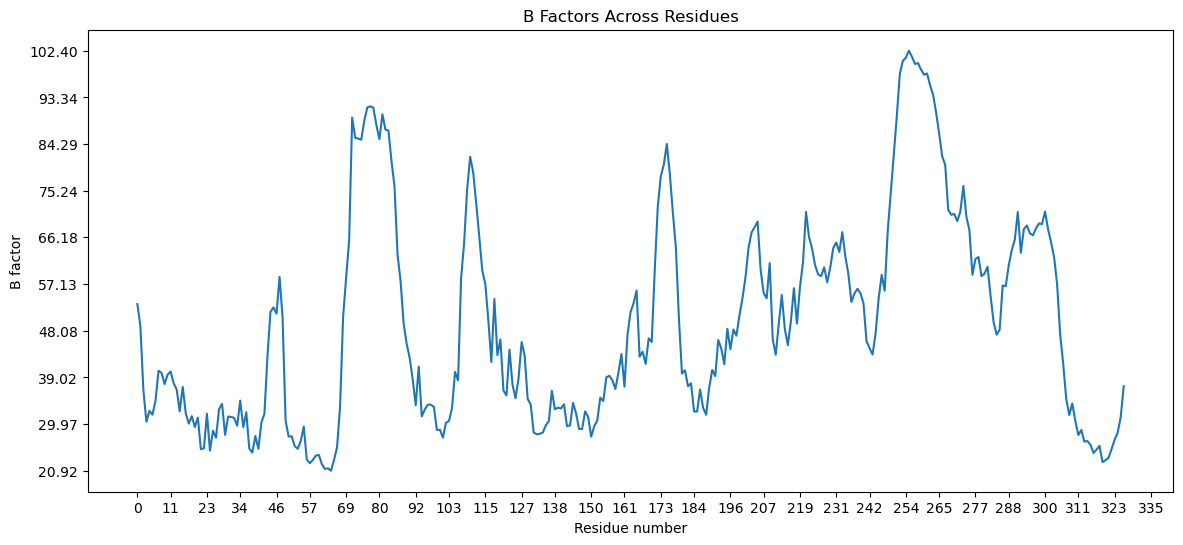

In [7]:
residue_min_b = residue_b_factors['B_iso_or_equiv'].min()
residue_max_b = residue_b_factors['B_iso_or_equiv'].max()

plt.figure(figsize=(14,6))
sns.lineplot(data=residue_b_factors['B_iso_or_equiv'], markers='o')
plt.xticks(np.linspace(0, 335, 30, dtype='int'))
plt.yticks(np.linspace(residue_min_b, residue_max_b, 10))
plt.title("B Factors Across Residues")
plt.ylabel("B factor")
plt.xlabel("Residue number")
plt.show()

The results for this plot may not be very surprising, since we just averaged the B factors of the atoms comprising each residue to represent the B factors for our residues. Our graph of the per-residue B factors is a smoothed version of the per-atom B factors graph.

The literature excerpt mentions the SMG loop between residues 266-279 in human OTCase and reports of the same flexibility in human ATCase. We can observe from this plot of B factors that a similar flexibility is observed around the same region in XcAOTC. Interestingly, there are several other regions with a notably high degree of flexibility, not just the 266-279 region mentioned in the literature:
- Around residues 70-90
- Around residue 116
- Around residue 175

Now that we have the graphical representation of the B factors across the protein, let's look at our protein in 3D space to determine where the areas of high flexibility are spatially.

In [8]:
view1 = py3Dmol.view(width=800, height=600)
view1.addModelsAsFrames(aotc_system)

view1.setStyle({'model': -1},{
    "cartoon": {
        "colorscheme": {
            "prop": "b", # color structure by b factor
            "gradient": "rwb", # red -> more rigid, blue -> more flexible 
            "min":residue_min_b,
            "max":residue_max_b
        }
    }
})

view1.addResLabels({"resi":list(range(70,90))}, {"fontColor":"black", "showBackground":False})
view1.addResLabels({"resi":[116]}, {"fontColor":"black", "showBackground":False})
view1.addResLabels({"resi":list(range(250,270))}, {"fontColor":"black", "showBackground":False}) # region of high flexibility
view1.zoomTo()
view1.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

This representation is a little messy with all the residue labels but we can definitely see the clustering of more disordered regions to one side of the protein than another.

Now that we understand the flexibility of this protein in an unbound state, we can follow up with the question:

**How does the B factor in our protein change with the binding of substrates?**

We can now investigate this question by doing a similar analysis with the other PDB structures we downloaded earlier.

First, we'll load all of the structures we've gotten so far through BioPandas into a combined `DataFrame` and have a peek at the features from our combined `DataFrame`.

In [9]:
structures = []
for struct_name, aotc_struct in zip(AOTC_STRUCTURE_IDS, aotc_cifs):
    current_struct = pmmcif.read_mmcif(aotc_struct).df['ATOM'].add_prefix(f"{struct_name}_") # 3kzn - aotc complexed with n-acetyl-l-ornithine
    structures.append(current_struct)

aotc_dfs = pd.concat(structures, axis=1)
aotc_dfs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2632 entries, 0 to 2631
Data columns (total 84 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   3kzc_group_PDB           2571 non-null   object 
 1   3kzc_id                  2571 non-null   float64
 2   3kzc_type_symbol         2571 non-null   object 
 3   3kzc_label_atom_id       2571 non-null   object 
 4   3kzc_label_alt_id        0 non-null      object 
 5   3kzc_label_comp_id       2571 non-null   object 
 6   3kzc_label_asym_id       2571 non-null   object 
 7   3kzc_label_entity_id     2571 non-null   float64
 8   3kzc_label_seq_id        2571 non-null   object 
 9   3kzc_pdbx_PDB_ins_code   2571 non-null   object 
 10  3kzc_Cartn_x             2571 non-null   float64
 11  3kzc_Cartn_y             2571 non-null   float64
 12  3kzc_Cartn_z             2571 non-null   float64
 13  3kzc_occupancy           2571 non-null   float64
 14  3kzc_B_iso_or_equiv      2571

In [10]:
aotc_dfs.head()

3kzc_group_PDB  3kzc_id 3kzc_type_symbol 3kzc_label_atom_id  \
0           ATOM      1.0                N                  N   
1           ATOM      2.0                C                 CA   
2           ATOM      3.0                C                  C   
3           ATOM      4.0                O                  O   
4           ATOM      5.0                C                 CB   

  3kzc_label_alt_id 3kzc_label_comp_id 3kzc_label_asym_id  \
0              None                LEU                  A   
1              None                LEU                  A   
2              None                LEU                  A   
3              None                LEU                  A   
4              None                LEU                  A   

   3kzc_label_entity_id 3kzc_label_seq_id 3kzc_pdbx_PDB_ins_code  ...  \
0                   1.0                23                   None  ...   
1                   1.0                23                   None  ...   
2                   1.0                23                   None  ...   
3                   1.0                23                   None  ...   
4                   1.0                23                   None  ...   

   3kzk_Cartn_y  3kzk_Cartn_z  3kzk_occupancy  3kzk_B_iso_or_equiv  \
0        49.949        78.554             1.0                38.40   
1        49.451        79.655             1.0                38.47   
2        50.038        79.509             1.0                37.77   
3        49.929        78.452             1.0                37.79   
4        47.919        79.627             1.0                39.87   

   3kzk_pdbx_formal_charge 3kzk_auth_seq_id  3kzk_auth_comp_id  \
0                     None              3.0                LEU   
1                     None              3.0                LEU   
2                     None              3.0                LEU   
3                     None              3.0                LEU   
4                     None              3.0                LEU   

  3kzk_auth_asym_id 3kzk_auth_atom_id 3kzk_pdbx_PDB_model_num  
0                 A                 N                     1.0  
1                 A                CA                     1.0  
2                 A                 C                     1.0  
3                 A                 O                     1.0  
4                 A                CB                     1.0  

[5 rows x 84 columns]

Now let's tidy up our `DataFrame` into long format where we can plot the relevant B factors across all proteins. Basically, this means that we will be extracting only the residue number the atom belongs to (given by *_auth_seq_id) and the relevant B factor (given by *_B_factor) and labeling each entry with the protein it came from (e.g., 3kzc, 3kzn, etc.):

In [11]:
long_dfs = []
for struct_id in AOTC_STRUCTURE_IDS:
    
    _ = aotc_dfs[[f"{struct_id}_auth_seq_id", f"{struct_id}_B_iso_or_equiv"]].copy()
    _ = _.rename(
        columns={
            f"{struct_id}_auth_seq_id": "residue_number",
            f"{struct_id}_B_iso_or_equiv": "B_factor"
        }
    )
    _["protein"] = struct_id
    long_dfs.append(_)

long_dfs = pd.concat(long_dfs, ignore_index=True)
long_dfs.head()

residue_number  B_factor protein
0             3.0     52.38    3kzc
1             3.0     51.85    3kzc
2             3.0     49.52    3kzc
3             3.0     49.99    3kzc
4             3.0     53.86    3kzc

Now let's plot our B factors across each protein:

<sub>*Note that this plot may take 10+ seconds to run because of how many data points there are.*<sub>

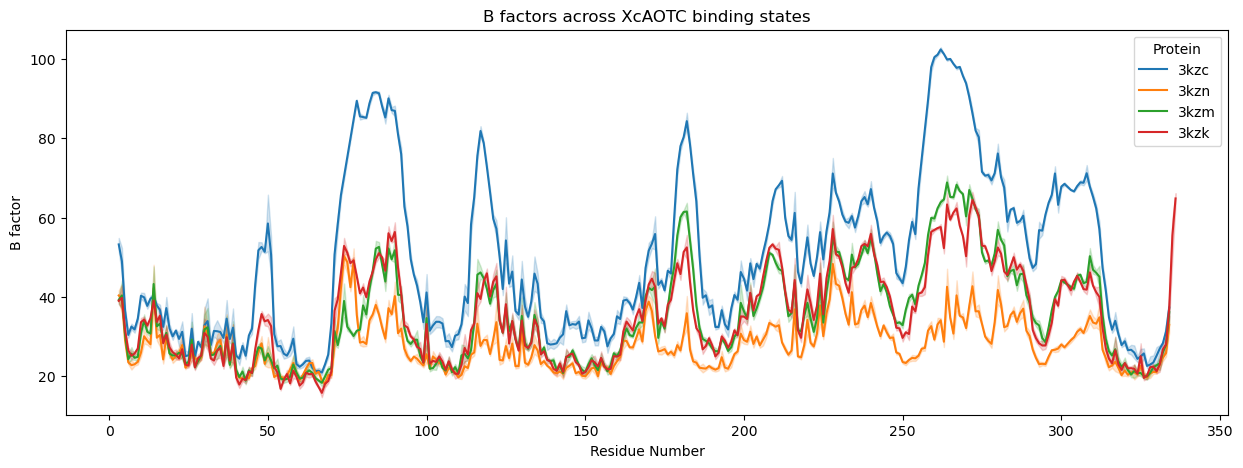

In [12]:
plt.figure(figsize=(15,5))
sns.lineplot(data=long_dfs, x="residue_number", y="B_factor", hue="protein")
plt.title("B factors across XcAOTC binding states")
plt.xlabel("Residue Number")
plt.ylabel("B factor")
plt.legend(title="Protein")
plt.show()

This is a very interesting plot. 

The structure with the most stable B factor overall is the complexed structure of XcAOTC with with N-acetyl-L-ornithine (3KZN, orange). On the other hand, complexes with CP and acetylcitrulline (3KZM, green, and 3KZK, red, respectively) tend to have B factors between the unbound protein state and the N-acetyl-L-ornithine bound state. The unbound protein (3KZC, blue), is thus the most flexible overall.

The difference is most dramatic around the SMG loop region, which stabilizes strongly with the binding of substrate.

Based on this plot of B factors, the SMG loop region stabilizes upon interaction with the ligands, **demonstrating that the flexibility of this loop is a common feature between the catalytic process for hATCase and XcAOTCase**. If we wanted to be more confident of the commonality between features, we could also compare other members of the ATCase/OTCase family (such as ATCase).

### Structural Question 2: What structural features distinguish between knotted (AOTCase, SOTCase, YTCase) from unknotted transcarbamylases, and how do these differences in structure constrain conformational changes during catalysis?

Inspiration from Source Literature:

> The proline-rich loop in members of the knotted transcarbamylase family prevents movement of the equivalent 240’s loop into the active site, making the conformational changes and relative domain movements of AOTCase associated with substrate binding much smaller (1.1°–2.2°) than those of the unknotted OTCase and ATCase

Shi, Dashuang, Allewell, N. M., & Tuchman, M. (2015). From genome to structure and back again: A family portrait of the transcarbamylases. International Journal of Molecular Sciences, 16(8), 18836–18864. https://doi.org/10.3390/ijms160818836

**Need to Knows**:
- How does the presence of a knot in the structure of a protein restrict the movement of the 240s loop compared to unknotted enzymes?
- How can we simulate substrate binding to a protein through software packages?
- What residues are conserved across knotted enzymes but absent in unknotted enzymes?
- Could the knotted architecture serve as a structural marker for annotating new transcarbamylases in genomic datasets?

### Investigating Question 2

AOTCase, succinylornithine transcarbamylase (SOTCase), and ygeW encoded protein (YTCase) are three knotted proteins which are evolutionarily divergent from the unknotted protein counterparts, namely, ATCase and OTCase. 

We can take a structural approach to investigate the movement of the 240s loop between unknotted and knotted forms of the enzyme by calculating the TM-score at the loop between the bound and unbound states of AOTCase. Recall that we already downloaded these structures locally.

Then, we can use the same approach to calculate the TM-score of the corresponding region between states for the equivalent unknotted proteins, OTCase and ATCase. 

Unfortunately, no PDB structures currently exist for XcOTCase and XcATCase. However, bound and unbound states of ATCase from a different model organism, *Trypanosoma cruzi* (Tc) exist:

- **6JKQ**: Crystal structure of ATC from Tc
- **6JKR**: Crystal structure of ATC from Tc in complex with CP
- **6JL4**: Crystal structure of ATC from Tc in complex with carbamoyl aspartate (CA) and inorganic phosphate (Pi)

We can take a hybrid approach to answer this question: Calculate the differences in structure shifts (through structure-aligned RMSD and TM-score) between the bound and unbound forms of TcATCase and AOTCase, and use the existing crystal structures from Tc as a template to predict the potential structure of XcATC betwween bound and unbound forms. 

First, we will need to download the Tc structures.

In [13]:
ATC_STRUCTURE_IDS = ["6jkq", "6jkr", "6jl4"]
atc_cifs = [pdb_list.retrieve_pdb_file(pdb_code=structure) for structure in ATC_STRUCTURE_IDS]

Structure exists: '.\structures\jk\6jkq.cif' 
Structure exists: '.\structures\jk\6jkr.cif' 
Structure exists: '.\structures\jl\6jl4.cif' 


In [14]:
with open(atc_cifs[0]) as file:
    atc_system = "".join([x for x in file])

view2 = py3Dmol.view(width=800, height=600)
view2.addModelsAsFrames(atc_system)
view2.setStyle({'model': -1}, {"cartoon": {'color': 'spectrum'}})
view2.addResLabels({"resi":list(range(230,250))}, {"fontColor":"black", "showBackground":False})
view2.zoomTo()
view2.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

We will have to align the structures first to ensure we are comparing the correct residues. To accomplish this, we will first need to align our resiudes using TM-align (Zhang, Y. & Skolnick, J.). Since we are interested in the 240s region, we will investigate the movement of the protein chain between residues 229 and 247 (Miller, R. C., et al., 2024).

To accomplish this, let's define some custom functions that will extract the sequence and coordinates from a subset of the `DataFrame` in which our structural information is stored. There is a python package [tmtools](https://github.com/jvkersch/tmtools) which can help us calculate the TM score of our alignment.

The first function we make is to create a filter for the relevant atoms. `create_loop_mask` filters the input `DataFrame` to return only the specified atom type on the chain specified between the amino acid indices specified.

Next, we create `extract_seq_and_coords`, which takes a `DataFrame` of atoms and optionally a filter mask (created by `create_loop_mask`) to specify what residues to compare. This will give us the sequence of the relevant region and the coordinates of the atom type specified in `create_loop_mask` (defaults to alpha carbons, 'CA')

In [15]:
from tmtools import tm_align

def create_loop_mask(atoms_df, loop_start: int, loop_end: int, chain:str='A', atom_type:str='CA'):
    """Create a boolean mask for filtering loop region CA atoms from a pandas dataframe"""
    return (
        (atoms_df['label_seq_id'].astype(int) >= loop_start) &
        (atoms_df['label_seq_id'].astype(int) <= loop_end) &
        (atoms_df['label_asym_id'] == chain) &
        (atoms_df['label_atom_id'] == atom_type)
    )

def extract_seq_and_coords(atoms_df, mask=None):
    """Extract coordinates and sequence from a masked DataFrame"""
    
    from Bio.Data.IUPACData import protein_letters_3to1
    PROTEIN_LETTERS = {k.upper(): v for k, v in protein_letters_3to1.items()}

    coord_columns = ['Cartn_x', 'Cartn_y', 'Cartn_z']
    resn_column = 'label_comp_id'
    df = atoms_df.copy()

    if mask is not None:
        df = atoms_df[mask].copy()
        
    seq = "".join(df[resn_column].map(PROTEIN_LETTERS))
    coords = df[coord_columns].to_numpy()
    
    return seq, coords

Now we should be able to extract the sequence and coordinate information for all three of our downloaded structures and store them for calculating the TM-score.

In [16]:
LOOP_START = 229
LOOP_END = 244 # structure for 6jkq is missing residues 245-265, so we can only view this portion for now.

seq_and_coords = {}

for struct_name, atc_struct in zip(ATC_STRUCTURE_IDS, atc_cifs):
    atoms_df = pmmcif.read_mmcif(atc_struct).df['ATOM']
    loop_mask = create_loop_mask(atoms_df, LOOP_START, LOOP_END, 'A', 'CA')
    seq_and_coords[struct_name] = extract_seq_and_coords(atoms_df, loop_mask)

Now we should be able to calculate the TM-align for all pairwise combinations in the dictionary.

Reminder that:
- **6JKQ**: Crystal structure of ATC from Tc
- **6JKR**: Crystal structure of ATC from Tc in complex with CP
- **6JL4**: Crystal structure of ATC from Tc in complex with carbamoyl aspartate (CA) and inorganic phosphate (Pi)

In [17]:
from itertools import combinations

results = []

for (id1, (seq1, coords1)), (id2, (seq2, coords2)) in combinations(seq_and_coords.items(), 2):
    result = tm_align(coords1, coords2, seq1, seq2)
    
    results.append({
        'structure_1': id1,
        'structure_2': id2,
        'rmsd': result.rmsd,
        'tm_score_1': result.tm_norm_chain1,
        'tm_score_2': result.tm_norm_chain2,
        'n_residues': len(seq1)
    })
    
    print(f"{id1} vs {id2}: RMSD = {result.rmsd:.3f} Å, TM-score = {result.tm_norm_chain1:.4f}")

results_df = pd.DataFrame(results)
print("\n=== All Pairwise Comparisons ===")
print(results_df.to_string(index=False))

6jkq vs 6jkr: RMSD = 0.386 Å, TM-score = 0.7245
6jkq vs 6jl4: RMSD = 0.461 Å, TM-score = 0.7711
6jkr vs 6jl4: RMSD = 0.134 Å, TM-score = 0.8765

=== All Pairwise Comparisons ===
structure_1 structure_2     rmsd  tm_score_1  tm_score_2  n_residues
       6jkq        6jkr 0.385584    0.724535    0.724535          16
       6jkq        6jl4 0.461114    0.771129    0.771129          16
       6jkr        6jl4 0.133855    0.876548    0.876548          16


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

def create_alignment_heatmaps(results_df):

    all_ids = sorted(set(results_df['structure_1'].tolist() + results_df['structure_2'].tolist()))

    rmsd_matrix = pd.DataFrame(0.0, index=all_ids, columns=all_ids)
    tm_matrix = pd.DataFrame(1.0, index=all_ids, columns=all_ids)
    
    for _, row in results_df.iterrows():
        rmsd_matrix.loc[row['structure_1'], row['structure_2']] = row['rmsd']
        rmsd_matrix.loc[row['structure_2'], row['structure_1']] = row['rmsd']
        
        tm_score = row['tm_score_1'] if 'tm_score_1' in row else row['tm_score']
        tm_matrix.loc[row['structure_1'], row['structure_2']] = tm_score
        tm_matrix.loc[row['structure_2'], row['structure_1']] = tm_score
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
    
    # RMSD
    sns.heatmap(rmsd_matrix, annot=True, fmt='.3f', cmap='RdYlGn_r', 
                cbar_kws={'label': 'RMSD (Å)'}, square=True, ax=ax1,
                linewidths=0.5, linecolor='gray')
    ax1.set_title('Pairwise Loop RMSD Comparison', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Structure', fontsize=12)
    ax1.set_ylabel('Structure', fontsize=12)
    
    # TM-score
    sns.heatmap(tm_matrix, annot=True, fmt='.3f', cmap='RdYlGn', 
                cbar_kws={'label': 'TM-score'}, square=True, ax=ax2,
                vmin=0, vmax=1, linewidths=0.5, linecolor='gray')
    ax2.set_title('Pairwise TM-score Comparison', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Structure', fontsize=12)
    ax2.set_ylabel('Structure', fontsize=12)
    
    # Add reference line for TM-score threshold
    ax2.text(0.02, 0.98, 'TM > 0.5: Same fold', 
             transform=ax2.transAxes, fontsize=10, 
             verticalalignment='top', bbox=dict(boxstyle='round', 
             facecolor='wheat', alpha=0.5))
    
    plt.tight_layout()
    plt.show()
    
    return rmsd_matrix, tm_matrix

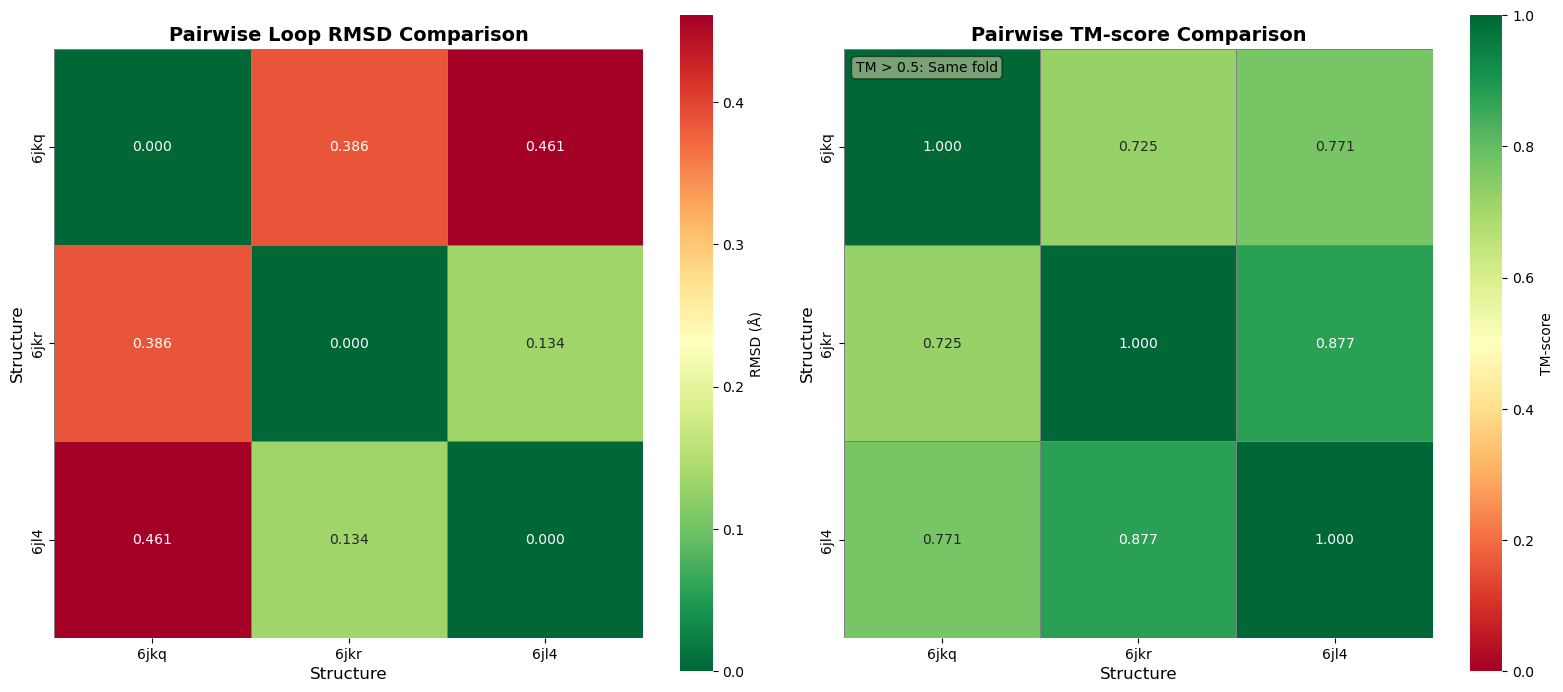


=== RMSD Matrix (Å) ===
          6jkq      6jkr      6jl4
6jkq  0.000000  0.385584  0.461114
6jkr  0.385584  0.000000  0.133855
6jl4  0.461114  0.133855  0.000000

=== TM-score Matrix ===
          6jkq      6jkr      6jl4
6jkq  1.000000  0.724535  0.771129
6jkr  0.724535  1.000000  0.876548
6jl4  0.771129  0.876548  1.000000


In [19]:
rmsd_matrix, tm_matrix = create_alignment_heatmaps(results_df)

# Print matrices
print("\n=== RMSD Matrix (Å) ===")
print(rmsd_matrix)
print("\n=== TM-score Matrix ===")
print(tm_matrix)

The two structures that exhibited the greatest RMSD were the unbound form of TcATC with the complexed forms. Interestingly, the RMSD between the bound forms of the protein are not too different structurally according to this analysis.

<h1 style="background-color:Tomato;">TODO:</h1>

- Do same analysis for AOTCase
- Use template-based protein modeling to predict the structure of XcATC between bound and unbound forms

### Structural Question 3: How do sequence variations in the 240s loop determine secondary substrate specificity across different enzymes within the transcarbamylase family?

Inspiration from Source Literature:
> The available structures of transcarbamylases demonstrate that SxRT, HPxQ and HxLP are common motifs involved in binding CP (even though some variations exist) and that thesemotifs are characteristic of all known transcarbamylases. Variations in four loops, the 80s loop, 120s loop, proline-rich loop, and 240s loop, determine the specificity of the second substrate.

Shi, Dashuang, Allewell, N. M., & Tuchman, M. (2015). From genome to structure and back again: A family portrait of the transcarbamylases. International Journal of Molecular Sciences, 16(8), 18836–18864. https://doi.org/10.3390/ijms160818836

**Need to Knows**:
- What are the conserved and variable motifs within the 240s loop across ATCase, OTCase, and PTCase enzymes?
- How do amino acid variations in the loop alter the geometry or the electrostatics of the second substrate binding pocket to prefer one substrate over another?
- Which residues are experimentally validated as key determinants of substrate specificity?
- Can homology modeling or molecular docking predict substrate preferences for transcarbamylases that do not have a solved structure?

### Annotation for Research Questions

These research questions stem largely from work by a single group that has extensively studied transcarbamylases, including the review article from 2015 used in submission for Part I. Since much of their work addresses loop flexibility, substrate specificity, and unusual topology, reviewing these primary and review papers should provide a foundation for answering parts of the “Need to Know” questions listed under the research questions. Course material up to module 4 also connects directly to these questions. For instance, the first question on loop flexibility relates to our discussions of B factors, which measure atomic displacement in PDB structures and can be used to assess mobility. Similarly, the practical exposure we had to molecular dynamics simulations and docking software offers a basis for addressing questions about substrate binding and loop movement. The third question on loop sequence variation and specificity links to sequence analysis methods and structural modeling tools (Chimera, PyMOL, etc.) we have additionally covered through our virtual labs. Finally, the transcarbamylase family is notable for its rare knotted proteins, making structural comparisons between knotted and unknotted members particularly compelling. Addressing this unusual and niche topology will require deeper literature review beyond class examples, but it offers a distinctive angle for exploring how protein architecture can limit the function of a protein.

## Bibliography

Shi, D., Morizono, H., Aoyagi, M., Tuchman, M., & Allewell, N. M. (2000). Crystal structure of human ornithine transcarbamylase complexed with carbamoyl phosphate and L-norvaline at 1.9 A resolution. Proteins, 39(4), 271–277. 

Jamroz, M., Niemyska, W., Rawdon, E. J., Stasiak, A., Millett, K. C., Sułkowski, P., & Sulkowska, J. I. (2015). KnotProt: a database of proteins with knots and slipknots. Nucleic Acids Research, 43(Database issue), D306-14. https://doi.org/10.1093/nar/gku1059

Shi, D., Morizono, H., Yu, X., Tong, L., Allewell, N. M., & Tuchman, M. (2001). Human ornithine transcarbamylase: crystallographic insights into substrate recognition and conformational changes. The Biochemical Journal, 354(Pt 3), 501–509. https://doi.org/10.1042/0264-6021:3540501

Shi, Dashuang, Allewell, N. M., & Tuchman, M. (2015). From genome to structure and back again: A family portrait of the transcarbamylases. International Journal of Molecular Sciences, 16(8), 18836–18864. https://doi.org/10.3390/ijms160818836

Shi, Dashuang, Allewell, N. M., & Tuchman, M. (2015). From genome to structure and back again: A family portrait of the transcarbamylases. International Journal of Molecular Sciences, 16(8), 18836–18864. https://doi.org/10.3390/ijms160818836

Bahar, I., Atilgan, A. R., & Erman, B. (1997). Direct evaluation of thermal fluctuations in proteins using a single-parameter harmonic potential. Folding & Design, 2(3), 173–181. https://doi.org/10.1016/S1359-0278(97)00024-2

Zhang, Y., & Skolnick, J. (2005). TM-align: a protein structure alignment algorithm based on the TM-score. Nucleic Acids Research, 33(7), 2302–2309. https://doi.org/10.1093/nar/gki524

Miller, R. C., Patterson, M. G., Bhatt, N., Pei, X., & Ando, N. (2024). Mechanism of nucleotide-dependent allosteric regulation in Escherichia coli aspartate transcarbamoylase. In bioRxivorg. https://doi.org/10.1101/2024.11.19.624407